In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [129]:
df = pd.read_csv('owid-covid-data.csv')
df.head()
# df.shape

iso_code      continent location        date  total_cases  new_cases  \
0      ABW  North America    Aruba  2020-03-13          2.0        2.0   
1      ABW  North America    Aruba  2020-03-19          NaN        NaN   
2      ABW  North America    Aruba  2020-03-20          4.0        2.0   
3      ABW  North America    Aruba  2020-03-21          NaN        NaN   
4      ABW  North America    Aruba  2020-03-22          NaN        NaN   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1               0.286           NaN         NaN                  0.0  ...   
2               0.286           0.0         0.0                  0.0  ...   
3               0.286           NaN         NaN                  0.0  ...   
4               0.286           NaN         NaN                  0.0  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0       35973.781              NaN                    NaN   
1       35973.781              NaN                    NaN   
2       35973.781              NaN                    NaN   
3       35973.781              NaN                    NaN   
4       35973.781              NaN                    NaN   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                11.62             NaN           NaN                     NaN   
1                11.62             NaN           NaN                     NaN   
2                11.62             NaN           NaN                     NaN   
3                11.62             NaN           NaN                     NaN   
4                11.62             NaN           NaN                     NaN   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         NaN            76.29                      NaN  
1                         NaN            76.29                      NaN  
2                         NaN            76.29                      NaN  
3                         NaN            76.29                      NaN  
4                         NaN            76.29                      NaN  

[5 rows x 41 columns]

In [130]:
def visualization(covid, title_text):
    fig = px.choropleth(covid, 
                    locations="location", 
                    locationmode = "country names",
                    color="new_cases", 
                    hover_name="location", 
                    animation_frame="date"
                   )
    fig.update_layout(
    title_text = title_text,
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
    fig.show()



In [131]:
covid_spread_country = df[df['new_cases'] > 0]
covid_spread_country = covid_spread_country.groupby(['date', 'location']).sum().reset_index()
visualization(covid_spread_country, 'Spread of Coronavirus')

# fig = px.choropleth(covid_spread_country, 
#                     locations="location", 
#                     locationmode = "country names",
#                     color="new_cases", 
#                     hover_name="location", 
#                     animation_frame="date"
#                    )

# fig.update_layout(
#     title_text = 'Spread of Coronavirus',
#     title_x = 0.5,
#     geo=dict(
#         showframe = False,
#         showcoastlines = False,
#     ))
    
# fig.show()

# covid_spread.head()

In [134]:
df_asia = df[df['continent'] == 'Asia']
df_asia = df_asia[df_asia['total_cases'] > 0]
df_asia.fillna(0).head()

iso_code continent     location        date  total_cases  new_cases  \
266      AFG      Asia  Afghanistan  2020-02-25          1.0        1.0   
267      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
268      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
269      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
270      AFG      Asia  Afghanistan  2020-02-29          1.0        0.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
266               0.143           0.0         0.0                  0.0  ...   
267               0.143           0.0         0.0                  0.0  ...   
268               0.143           0.0         0.0                  0.0  ...   
269               0.143           0.0         0.0                  0.0  ...   
270               0.143           0.0         0.0                  0.0  ...   

     gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
266        1803.987              0.0                597.029   
267        1803.987              0.0                597.029   
268        1803.987              0.0                597.029   
269        1803.987              0.0                597.029   
270        1803.987              0.0                597.029   

     diabetes_prevalence  female_smokers  male_smokers  \
266                 9.59             0.0           0.0   
267                 9.59             0.0           0.0   
268                 9.59             0.0           0.0   
269                 9.59             0.0           0.0   
270                 9.59             0.0           0.0   

     handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
266                  37.746                         0.5            64.83   
267                  37.746                         0.5            64.83   
268                  37.746                         0.5            64.83   
269                  37.746                         0.5            64.83   
270                  37.746                         0.5            64.83   

     human_development_index  
266                    0.498  
267                    0.498  
268                    0.498  
269                    0.498  
270                    0.498  

[5 rows x 41 columns]

In [135]:
covid_spread_asia = df_asia.groupby(['date', 'location']).sum().reset_index()
visualization(covid_spread_asia, 'corona cases in asia')

In [136]:
covid_spread_asia

date              location  total_cases  new_cases  \
0      2019-12-31                 China         27.0       27.0   
1      2020-01-01                 China         27.0        0.0   
2      2020-01-02                 China         27.0        0.0   
3      2020-01-03                 China         44.0       17.0   
4      2020-01-04                 China         44.0        0.0   
...           ...                   ...          ...        ...   
10585  2020-10-13                Turkey     337147.0     1614.0   
10586  2020-10-13  United Arab Emirates     107293.0     1064.0   
10587  2020-10-13            Uzbekistan      61534.0      436.0   
10588  2020-10-13               Vietnam       1110.0        1.0   
10589  2020-10-13                 Yemen       2056.0        1.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                   0.000           0.0         0.0                0.000   
1                   0.000           0.0         0.0                0.000   
2                   0.000           0.0         0.0                0.000   
3                   0.000           0.0         0.0                0.000   
4                   0.000           0.0         0.0                0.000   
...                   ...           ...         ...                  ...   
10585            1585.857        8895.0        58.0               56.714   
10586            1080.000         446.0         1.0                2.429   
10587             369.714         510.0         5.0                3.571   
10588               1.857          35.0         0.0                0.000   
10589               1.571         596.0         0.0                0.571   

       total_cases_per_million  new_cases_per_million  ...  gdp_per_capita  \
0                        0.019                  0.019  ...       15308.712   
1                        0.019                  0.000  ...       15308.712   
2                        0.019                  0.000  ...       15308.712   
3                        0.031                  0.012  ...       15308.712   
4                        0.031                  0.000  ...       15308.712   
...                        ...                    ...  ...             ...   
10585                 3997.519                 19.137  ...       25129.341   
10586                10848.196                107.579  ...       67293.483   
10587                 1838.526                 13.027  ...        6253.104   
10588                   11.403                  0.010  ...        6171.884   
10589                   68.933                  0.034  ...        1479.147   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  0.7                261.899                 9.74   
1                  0.7                261.899                 9.74   
2                  0.7                261.899                 9.74   
3                  0.7                261.899                 9.74   
4                  0.7                261.899                 9.74   
...                ...                    ...                  ...   
10585              0.2                171.285                12.13   
10586              0.0                317.840                17.26   
10587              0.0                724.417                 7.57   
10588              2.0                245.465                 6.00   
10589             18.8                495.003                 5.35   

       female_smokers  male_smokers  handwashing_facilities  \
0                 1.9          48.4                   0.000   
1                 1.9          48.4                   0.000   
2                 1.9          48.4                   0.000   
3                 1.9          48.4                   0.000   
4                 1.9          48.4                   0.000   
...               ...           ...                     ...   
10585            14.1          41.1                   0.000   
10586        

Predicting future corona cases in nepal

    1.Preparing dataset

In [137]:
# Modifying the dataset for creating train and test set
df = df[df['location'] == 'Nepal'].reset_index()
df = df[df['total_cases'] > 10000]
df = df[['continent', 'location', 'date', 'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases', 'total_deaths']]
indexes = list(range(1,112))
df['Index'] = indexes
# df.insert(0, 'Index', indexes, False)
# df = df.set_index('Index')
df

continent location        date  new_cases_smoothed  new_deaths_smoothed  \
177      Asia    Nepal  2020-06-25             507.286                0.429   
178      Asia    Nepal  2020-06-26             473.429                0.571   
179      Asia    Nepal  2020-06-27             497.286                0.714   
180      Asia    Nepal  2020-06-28             450.000                0.714   
181      Asia    Nepal  2020-06-29             535.143                0.714   
..        ...      ...         ...                 ...                  ...   
283      Asia    Nepal  2020-10-09            2698.429               11.571   
284      Asia    Nepal  2020-10-10            2603.714               11.429   
285      Asia    Nepal  2020-10-11            3016.286               12.286   
286      Asia    Nepal  2020-10-12            2990.286               14.429   
287      Asia    Nepal  2020-10-13            3219.857               13.000   

     total_cases  total_deaths  Index  
177      10728.0          23.0      1  
178      11162.0          26.0      2  
179      11755.0          27.0      3  
180      11755.0          27.0      4  
181      12772.0          28.0      5  
..           ...           ...    ...  
283      98617.0         590.0    107  
284     100676.0         600.0    108  
285     105684.0         614.0    109  
286     107755.0         636.0    110  
287     111802.0         645.0    111  

[111 rows x 8 columns]

In [199]:
# Creating Training set
x_train = np.array(df['Index']).reshape(-1, 1)
y_train = np.array(df['total_cases']).reshape(-1, 1)
# x_train

In [200]:
from sklearn.preprocessing import PolynomialFeatures #Got insight about this from Diwas dai
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [201]:
# # Using Linear regression [trying to fit a straight line between features and labels] where features are in degree of 1.
# model = linear_model.LinearRegression()
# model.fit(x_train, y_train)
# accuracy = model.score(x_train, y_train)
# print('accuracy = {}%'.format(round(accuracy * 100, 2)))

In [202]:
# raising the features to an exponent
for i in range(1,8):
    polyfet = PolynomialFeatures(degree = i)
    x_modified = polyfet.fit_transform(x_train)
    model = linear_model.LinearRegression()
    model.fit(x_modified, y_train)
    accuracy = model.score(x_modified, y_train)
    print('accuracy with degree {} = {}%'.format(i, round(accuracy * 100, 2)))

accuracy with degree 1 = 86.37%
accuracy with degree 2 = 99.15%
accuracy with degree 3 = 99.78%
accuracy with degree 4 = 99.78%
accuracy with degree 5 = 99.93%
accuracy with degree 6 = 99.98%
accuracy with degree 7 = 99.99%


In [203]:
polyfet = PolynomialFeatures(degree = 7)
x_modified = polyfet.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(x_modified, y_train)
y_pred = model.predict(x_modified)
y_real = np.array(df['total_cases']).reshape(-1,1)
# y_prediction
# y_real

Text(0.5, 1.0, 'Comparing real vs prediction')

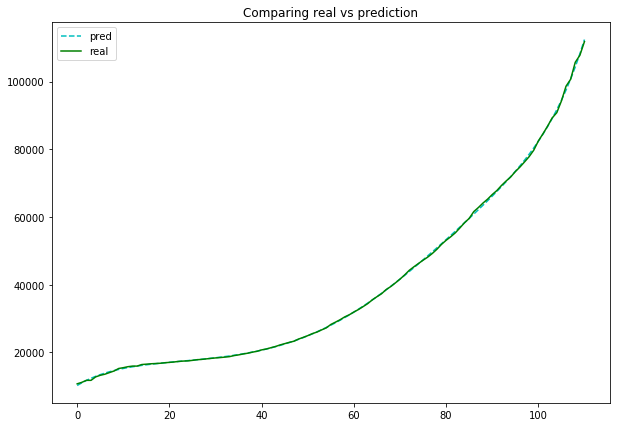

In [204]:
plt.figure(figsize=(10,7))
plt.plot(y_pred, '--c')
plt.plot(y_real, '-g')
plt.legend(['pred', 'real'])
plt.title('Comparing real vs prediction')


Predicting Future Corona Cases in Nepal

In [192]:
random = np.arange(30).reshape(-1,1)
x_future = random + x_train[-1:]
x_future
# x_future = random + x_train

array([[111],
       [112],
       [113],
       [114],
       [115],
       [116],
       [117],
       [118],
       [119],
       [120],
       [121],
       [122],
       [123],
       [124],
       [125],
       [126],
       [127],
       [128],
       [129],
       [130],
       [131],
       [132],
       [133],
       [134],
       [135],
       [136],
       [137],
       [138],
       [139],
       [140]])

In [193]:
y_future_pred = model.predict(polyfet.fit_transform(x_future))

Text(0, 0.5, 'Total Cases')

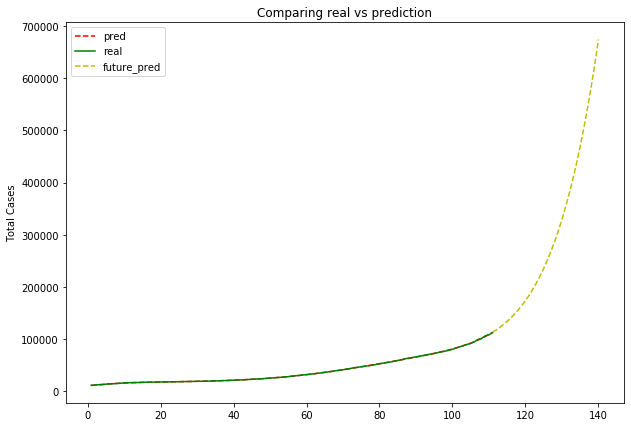

In [206]:
plt.figure(figsize=(10,7))
plt.plot(x_train, y_pred, '--r')
plt.plot(x_train, y_real, '-g')
plt.plot(x_future, y_future_pred, '--y')
plt.legend(['pred', 'real', 'future_pred'])
plt.title('Comparing real vs prediction')
plt.ylabel('Total Cases')